In [1]:
import numpy as np
import pandas as pd

# Import Dataset

In [2]:
#import dataset
df = pd.read_csv("C://Users/haikalef/Downloads/bank-additional/bank-additional/bank-additional-full.csv", sep=";")
df.shape

(41188, 21)

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

# Exploratory Data Analysis

[]

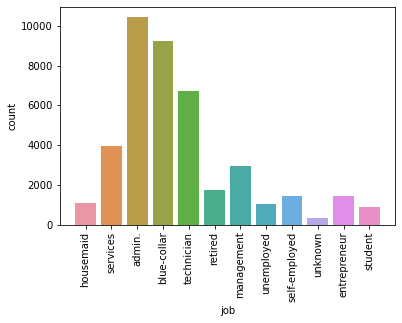

In [6]:
#cek df['job'] dengan countplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['job'])
plt.xticks(rotation=90)
plt.plot()

<AxesSubplot:xlabel='default', ylabel='count'>

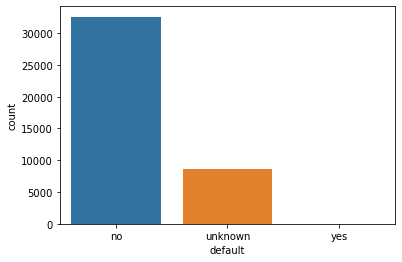

In [7]:
#cek df['default']
sns.countplot(x=df['default'])

In [8]:
print("count yes:", df['default'].value_counts()['yes'])

count yes: 3


Dari visualisasi diatas dapat kita lihat bahwa nilai yes hanya ada 3, bahkan sampai tidak terlihat pada countplot. Maka dari itu dapat disimpulkan bahwa, nilai yes merupakan outlier. Outlier itu adalah date pencilan, data yang memiliki karakteristik yang berbeda jauh dari observasi-observasi lainnya dan muncul dalam bentuk nilai ekstrim baik untuk variabel tunggal atau variabel kombinasi

In [9]:
#ubah nilai label untuk melihat korelasi pada heatmap
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

#convert string into numbers
df['y'] = le.fit_transform(df['y'])
print(df['y'])

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32


In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


<AxesSubplot:>

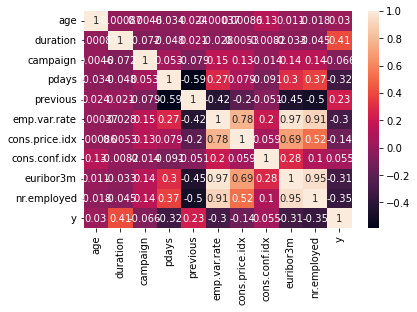

In [11]:
#numerical varible correlation
df_heat = df.corr()
sns.heatmap(df_heat, annot=True)

Dari heatmap diatas dapat kita lihat ada yang memiliki korelasi yang tinggi selain 1 antara feature dan feature seperti, euribor3m dengan emp.var.rate, nr.employed dengan emp.var.rate, cons.price.idx dengan emp.var.rate dapat kita buang salah satu feature. Selain itu kita juga dapat melihat data yang memiliki korelasi yang rendah (mendekati 0) antara feature dan label yang berarti tidak memiliki korelasi atau hubungan terhadap label, yang mana kita juga dapat buang salah satu, seperti y dan age, y dan campaign, y dan cons.price.idx, y dan cons.conf.idx.

In [12]:
#using cramer's v : chi-square, untuk melihat korelasi dari varible yang categorical
#encoding semua data categorical
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

#convert string into numbers
df['marital'] = le.fit_transform(df['marital'])
print(df['marital'])

0        1
1        1
2        1
3        1
4        1
        ..
41183    1
41184    1
41185    1
41186    1
41187    1
Name: marital, Length: 41188, dtype: int32


In [13]:
#encode df['education'] -> 
'''
basic.4y = 0
basic.6y = 1
basic.9y = 2
high school = 3
illiterate = 4
professional.course = 5
university.degree = 6
'''

df['education'] = le.fit_transform(df['education'])
print(df['education'])

0        0
1        3
2        3
3        1
4        3
        ..
41183    5
41184    5
41185    6
41186    5
41187    5
Name: education, Length: 41188, dtype: int32


In [14]:
#encode df['default'] -> no:0, yes:1

df['default'] = le.fit_transform(df['default'])
print(df['default'])

0        0
1        1
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: default, Length: 41188, dtype: int32


In [15]:
#encode df['housing'] -> no:0 , yes:1

df['housing'] = le.fit_transform(df['housing'])
print(df['housing'])

0        0
1        0
2        2
3        0
4        0
        ..
41183    2
41184    0
41185    2
41186    0
41187    2
Name: housing, Length: 41188, dtype: int32


In [16]:
#encode df['loan'] -> no:0, yes:1

df['loan'] = le.fit_transform(df['loan'])
print(df['loan'])

0        0
1        0
2        0
3        0
4        2
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: loan, Length: 41188, dtype: int32


In [17]:
#encode df['contact'] -> cellular:0, telephone:1

df['contact'] = le.fit_transform(df['contact'])
print(df['contact'])

0        1
1        1
2        1
3        1
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: contact, Length: 41188, dtype: int32


In [18]:
#encode df['month'] -> 
#april:0, august:1, December:2, july:3, june:4, march:5, may:6, November:7, october:8, september:9

df['month'] = le.fit_transform(df['month'])
print(df['month'])

0        6
1        6
2        6
3        6
4        6
        ..
41183    7
41184    7
41185    7
41186    7
41187    7
Name: month, Length: 41188, dtype: int32


In [19]:
#encode df['day_of_week'] ->
#fri:0, mon:1, thu:2, tue:3, wed:4

df['day_of_week'] = le.fit_transform(df['day_of_week'])
print(df['day_of_week'])

0        1
1        1
2        1
3        1
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: day_of_week, Length: 41188, dtype: int32


In [20]:
#encode df['poutcome'] -> failure:0, nonexistent:1, success:2

df['poutcome'] = le.fit_transform(df['poutcome'])
print(df['poutcome'])

0        1
1        1
2        1
3        1
4        1
        ..
41183    1
41184    1
41185    1
41186    1
41187    0
Name: poutcome, Length: 41188, dtype: int32


In [21]:
#encode df['poutcome'] ->
'''
admin: 0
blue-collar: 1
entrepreneur: 2
housemaid: 3
management: 4
retired: 5
self-employed: 6
services: 7
student: 8
technician: 9
unemployed: 10
unknown: 11
'''

df['job'] = le.fit_transform(df['job'])
print(df['job'])

0        3
1        7
2        7
3        0
4        7
        ..
41183    5
41184    1
41185    5
41186    9
41187    5
Name: job, Length: 41188, dtype: int32


In [22]:
df_cat_encoded = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']]
df_cat_encoded

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,1,0,0,1,6,1,1,0
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,2,1,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,0,7,0,1,1
41184,1,1,5,0,0,0,0,7,0,1,0
41185,5,1,6,0,2,0,0,7,0,1,0
41186,9,1,5,0,0,0,0,7,0,1,1


In [23]:
import scipy.stats as stats

def cramer_v_corr(X, y):
    X = df_cat_encoded[X]
    y = df_cat_encoded[y]
    
    input_data = pd.crosstab(X, y)
    chi2 = stats.chi2_contingency(input_data,
                                  correction=False)[0]
    minimum_dimension = min(input_data.shape)-1
    N = len(X)

    cramer_v_corr = np.sqrt((chi2/N) / minimum_dimension)
    return cramer_v_corr

In [24]:
cramer_v_corr('y', 'y')

1.0

## Lets Check Dataset!!!

In [31]:
#import dataset
df = pd.read_csv("C://Users/haikalef/Downloads/bank-additional/bank-additional/bank-additional-full.csv", sep=";")
df.shape

(41188, 21)

# Cleaning dataset

In [33]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [34]:
df['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

In [35]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [36]:
print("count unknown:", df['job'].value_counts()['unknown'])

count unknown: 330


In [37]:
df['job'] = df['job'].replace(['unknown'], np.nan) #ganti dengan mode[0]

In [38]:
df['job'].isnull().sum()

330

In [39]:
#nilai nan sama dengan jumlah nilai unknown, maka lanjut ketahap selanjutnya
#setelah kita menggantikan nilai unknown menjadi nilai NaN, maka kita dapat menerapkan metode 'ffill' untuk menggantikan nilai NaN menjadi nilai yang ada didepannya

df['job'] = df['job'].fillna(df['job'].mode()[0])

In [40]:
df['job'].isnull().sum()

0

In [41]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

Nah, dapat dilihat setelah diganti nilai dengan menggunakan method "mode", sudah tidak ada lagi nilai unknown pada df['job']

In [42]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [43]:
print("count unknown:", df['marital'].value_counts()['unknown'])

count unknown: 80


In [44]:
df['marital'] = df['marital'].replace(['unknown'], np.nan)

In [45]:
df['marital'].isnull().sum()

80

In [46]:
#nilai nan sama dengan jumlah nilai unknown, maka lanjut ketahap selanjutnya
#method ffill

df['marital'] = df['marital'].fillna(df['marital'].mode()[0])

In [47]:
df['marital'].isnull().sum()

0

In [48]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

dapat dilihat setelah diganti nilai dengan menggunakan method "mode", sudah tidak ada lagi nilai unknown pada df['martial']

In [49]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [50]:
print("count unknown:", df['education'].value_counts()['unknown'])

count unknown: 1731


In [51]:
df['education'] = df['education'].replace(['unknown'], np.nan)

In [52]:
df['education'].isnull().sum()

1731

In [53]:
#nilai nan sama dengan jumlah nilai unknown, maka lanjut ketahap selanjutnya
#method mode

df['education'] = df['education'].fillna(df['education'].mode()[0])

In [54]:
df['education'].isnull().sum()

0

In [55]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

dapat dilihat setelah diganti nilai dengan menggunakan method "mode", sudah tidak ada lagi nilai unknown pada df['education']

In [56]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [57]:
print("count unknown:", df['default'].value_counts()['unknown'])

count unknown: 8597


In [58]:
print("count unknown:", df['default'].value_counts()['yes'])

count unknown: 3


In [59]:
print("count unknown:", df['default'].value_counts()['no'])

count unknown: 32588


In [60]:
df['default'] = df['default'].replace(['unknown'], np.nan)

In [61]:
df['default'].isnull().sum()

8597

In [62]:
#nilai nan sama dengan jumlah nilai unknown, maka lanjut ketahap selanjutnya
#method mode

df['default'] = df['default'].fillna(df['default'].mode()[0])

In [63]:
df['default'].isnull().sum()

0

In [64]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

dapat dilihat setelah diganti nilai dengan menggunakan method "mode", sudah tidak ada lagi nilai unknown pada df['default']

In [65]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [66]:
print("count unknown:", df['housing'].value_counts()['unknown'])

count unknown: 990


In [67]:
df['housing'] = df['housing'].replace(['unknown'], np.nan)

In [68]:
df['housing'].isnull().sum()

990

In [69]:
#nilai nan sama dengan jumlah nilai unknown, maka lanjut ketahap selanjutnya
#method mode

df['housing'] = df['housing'].fillna(df['housing'].mode()[0])

In [70]:
df['housing'].isnull().sum()

0

In [71]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

dapat dilihat setelah diganti nilai dengan menggunakan method "mode", sudah tidak ada lagi nilai unknown pada df['housing']

In [72]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [73]:
print("count unknown:", df['loan'].value_counts()['unknown'])

count unknown: 990


In [74]:
df['loan'] = df['loan'].replace(['unknown'], np.nan)

In [75]:
df['loan'].isnull().sum()

990

In [76]:
#nilai nan sama dengan jumlah nilai unknown, maka lanjut ketahap selanjutnya
#method ffill

df['loan'] = df['loan'].fillna(df['loan'].mode()[0])

In [77]:
df['loan'].isnull().sum()

0

In [78]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

dapat dilihat setelah diganti nilai dengan menggunakan method "mode", sudah tidak ada lagi nilai unknown pada df['housing']

In [79]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [80]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [81]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [82]:
df['duration'].unique()

array([ 261,  149,  226, ..., 1246, 1556, 1868], dtype=int64)

In [84]:
not_number = []

for i in range(0, len(df['duration'])):
    temp_numbers = df['duration'][i]
    if temp_numbers.isdigit() == True:
        continue
    else:
        not_number.append(temp_numbers)        

AttributeError: 'numpy.int64' object has no attribute 'isdigit'

karena nilai data pada df['duration'] merupakan integer, maka dapat dipastikan tidak ada nilai missing value yang unique seperti strip ataupun yang lain

In [87]:
df['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

In [88]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [89]:
df['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [90]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [91]:
df['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [92]:
df['cons.price.idx'].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [93]:
df['cons.conf.idx'].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [94]:
df['euribor3m'].unique()

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

In [95]:
df['nr.employed'].unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

In [96]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

Setelah kita melakukan cleaning and preprocessing data, maka langkah selanjutnya menentukan kolom mana yang menjadi feature dan label. Pada assignment 3 ini, diminta kolom y sebagai output/label/target yang dimana y itu sendiri adalah apakah klien berlangganan deposito berjangka dan nilai dari y itu hanya dua 'yes', 'no'

In [97]:
#features variable and label

X = df.drop('y', 1)
y = df.y

C:\Users\haikalef\AppData\Local\Temp\ipykernel_5364\3823854917.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('y', 1)


In [98]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [99]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

Sebelum melanjutkan ke tahap classification, kita perlu untuk mengubah data-data yang merupakan categorical menjadi numerical

# Encoding Data

In [100]:
#encode data yang masih merupakan categorical
#encode df['job'] -> one hot encoding / pd.get_dummies(data)
#encode yang labelEncoder terlebih dahulu
#encode df['marital'] -> labelEncoder() : divorced:0, married:1, single:2

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

#convert string into numbers
X['marital'] = le.fit_transform(X['marital'])
print(X['marital'])

0        1
1        1
2        1
3        1
4        1
        ..
41183    1
41184    1
41185    1
41186    1
41187    1
Name: marital, Length: 41188, dtype: int32


In [101]:
#encode df['education'] -> 
'''
basic.4y = 0
basic.6y = 1
basic.9y = 2
high school = 3
illiterate = 4
professional.course = 5
university.degree = 6
'''

X['education'] = le.fit_transform(X['education'])
print(X['education'])

0        0
1        3
2        3
3        1
4        3
        ..
41183    5
41184    5
41185    6
41186    5
41187    5
Name: education, Length: 41188, dtype: int32


In [102]:
#encode df['default'] -> no:0, yes:1

X['default'] = le.fit_transform(X['default'])
print(X['default'])

0        0
1        0
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: default, Length: 41188, dtype: int32


In [103]:
#encode df['housing'] -> no:0 , yes:1

X['housing'] = le.fit_transform(X['housing'])
print(X['housing'])

0        0
1        0
2        1
3        0
4        0
        ..
41183    1
41184    0
41185    1
41186    0
41187    1
Name: housing, Length: 41188, dtype: int32


In [104]:
#encode df['loan'] -> no:0, yes:1

X['loan'] = le.fit_transform(X['loan'])
print(X['loan'])

0        0
1        0
2        0
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: loan, Length: 41188, dtype: int32


In [105]:
#encode df['contact'] -> cellular:0, telephone:1

X['contact'] = le.fit_transform(X['contact'])
print(X['contact'])

0        1
1        1
2        1
3        1
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: contact, Length: 41188, dtype: int32


In [106]:
#encode df['month'] -> 
#april:0, august:1, December:2, july:3, june:4, march:5, may:6, November:7, october:8, september:9

X['month'] = le.fit_transform(X['month'])
print(X['month'])

0        6
1        6
2        6
3        6
4        6
        ..
41183    7
41184    7
41185    7
41186    7
41187    7
Name: month, Length: 41188, dtype: int32


In [107]:
#encode df['day_of_week'] ->
#fri:0, mon:1, thu:2, tue:3, wed:4

X['day_of_week'] = le.fit_transform(X['day_of_week'])
print(X['day_of_week'])

0        1
1        1
2        1
3        1
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: day_of_week, Length: 41188, dtype: int32


In [108]:
#encode df['poutcome'] -> failure:0, nonexistent:1, success:2

X['poutcome'] = le.fit_transform(X['poutcome'])
print(X['poutcome'])

0        1
1        1
2        1
3        1
4        1
        ..
41183    1
41184    1
41185    1
41186    1
41187    0
Name: poutcome, Length: 41188, dtype: int32


In [109]:
#encode onehot encoding / pd.get_dummies

X = pd.get_dummies(X)

In [110]:
X.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,1,0,0,0,0,1,6,1,261,...,0,0,1,0,0,0,0,0,0,0
1,57,1,3,0,0,0,1,6,1,149,...,0,0,0,0,0,0,1,0,0,0
2,37,1,3,0,1,0,1,6,1,226,...,0,0,0,0,0,0,1,0,0,0
3,40,1,1,0,0,0,1,6,1,151,...,0,0,0,0,0,0,0,0,0,0
4,56,1,3,0,0,1,1,6,1,307,...,0,0,0,0,0,0,1,0,0,0


# Feature Selection

In [111]:
from sklearn.feature_selection import RFECV, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedGroupKFold

In [112]:
%%time
fs = RFE(estimator=RandomForestClassifier(),
         verbose=1)
fs.fit(X, y)

Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
CPU times: total: 49.6 s
Wall time: 49.6 s


RFE(estimator=RandomForestClassifier(), verbose=1)

In [113]:
fs.get_feature_names_out()

array(['age', 'marital', 'education', 'housing', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'poutcome', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.'],
      dtype=object)

In [114]:
fs.ranking_

array([ 1,  1,  1, 16,  1,  3,  6,  1,  1,  1,  1,  1,  4,  1,  2,  1,  1,
        1,  1,  1,  7, 13, 15,  8, 10, 12,  9, 11,  5, 14])

In [115]:
fs.feature_names_in_

array(['age', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed'],
      dtype=object)

In [116]:
for rank_, feature_ in zip(fs.ranking_, fs.feature_names_in_):
    if rank_ == 1:
        print(feature_)

age
marital
education
housing
month
day_of_week
duration
campaign
pdays
poutcome
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
job_admin.


In [117]:
X_filtered = X[list(fs.get_feature_names_out())]
X_filtered

,age,marital,education,housing,month,day_of_week,duration,campaign,pdays,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.
0,56,1,0,0,6,1,261,1,999,1,93.994,-36.4,4.857,5191.0,0
1,57,1,3,0,6,1,149,1,999,1,93.994,-36.4,4.857,5191.0,0
2,37,1,3,1,6,1,226,1,999,1,93.994,-36.4,4.857,5191.0,0
3,40,1,1,0,6,1,151,1,999,1,93.994,-36.4,4.857,5191.0,1
4,56,1,3,0,6,1,307,1,999,1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,5,1,7,0,334,1,999,1,94.767,-50.8,1.028,4963.6,0
41184,46,1,5,0,7,0,383,1,999,1,94.767,-50.8,1.028,4963.6,0
41185,56,1,6,1,7,0,189,2,999,1,94.767,-50.8,1.028,4963.6,0
41186,44,1,5,0,7,0,442,1,999,1,94.767,-50.8,1.028,4963.6,0


# Machine Learning Algorithm

## 1. Logistic Regression

In [118]:
#import package, function
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [119]:
X_filtered

,age,marital,education,housing,month,day_of_week,duration,campaign,pdays,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.
0,56,1,0,0,6,1,261,1,999,1,93.994,-36.4,4.857,5191.0,0
1,57,1,3,0,6,1,149,1,999,1,93.994,-36.4,4.857,5191.0,0
2,37,1,3,1,6,1,226,1,999,1,93.994,-36.4,4.857,5191.0,0
3,40,1,1,0,6,1,151,1,999,1,93.994,-36.4,4.857,5191.0,1
4,56,1,3,0,6,1,307,1,999,1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,5,1,7,0,334,1,999,1,94.767,-50.8,1.028,4963.6,0
41184,46,1,5,0,7,0,383,1,999,1,94.767,-50.8,1.028,4963.6,0
41185,56,1,6,1,7,0,189,2,999,1,94.767,-50.8,1.028,4963.6,0
41186,44,1,5,0,7,0,442,1,999,1,94.767,-50.8,1.028,4963.6,0


In [120]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [121]:
#split data
x_train, x_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2)

In [122]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\haikalef\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
y_pred = model.predict(x_test)

In [124]:
X_filtered.shape

(41188, 15)

In [125]:
y.shape

(41188,)

In [126]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9140568099053168
Confusion Matrix:
 [[7178  202]
 [ 506  352]]


## 2. K-Nearest Neighbors 

In [127]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred2 = knn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Accuracy: 0.9101723719349356
Confusion Matrix:
 [[7070  310]
 [ 430  428]]


## 3. Support Vector Machine

In [128]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)

y_pred3 = svm_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))

Accuracy: 0.9017965525613013
Confusion Matrix:
 [[7248  132]
 [ 677  181]]


## 4. Decision Tree

In [129]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred4 = dt.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred4))

Accuracy: 0.888443797038116
Confusion Matrix:
 [[6855  525]
 [ 394  464]]


## 5. Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() 
rf.fit(x_train, y_train)

y_pred5 = rf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred5))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred5))

Accuracy: 0.9161204175770818
Confusion Matrix:
 [[7097  283]
 [ 408  450]]


## 6. Naive Bayes

In [131]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred6 = nb.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred6))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred6))

Accuracy: 0.8869871327992231
Confusion Matrix:
 [[6816  564]
 [ 367  491]]
